In [1]:
import pandas as pd
import numpy as np
import scipy.stats as spst

import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
bus_station = pd.read_csv('1.1 BUS_STATION_BOARDING_MONTH_202204.csv', sep=",", encoding = "cp949")
seoul_moving = pd.read_csv('1.2 seoul_moving_month_4.csv', sep=",", index_col=0, encoding='UTF-8')

In [3]:
# 서울 내 이동만 포함
seoul_moving = seoul_moving[(seoul_moving["출발 시군구 코드"] < 20000) & (seoul_moving["도착 시군구 코드"] < 20000)]

In [13]:
seoul_moving['이동인구(합)'].replace("*", "2", inplace=True)
seoul_moving = seoul_moving.astype({'이동인구(합)': float})

seoul_moving.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10655895 entries, 0 to 920414
Data columns (total 10 columns):
 #   Column       Dtype  
---  ------       -----  
 0   대상연월         int64  
 1   요일           object 
 2   도착시간         int64  
 3   출발 시군구 코드    int64  
 4   도착 시군구 코드    int64  
 5   성별           object 
 6   나이           int64  
 7   이동유형         object 
 8   평균 이동 시간(분)  int64  
 9   이동인구(합)      float64
dtypes: float64(1), int64(6), object(3)
memory usage: 894.3+ MB


In [14]:
bus_station.head()

,사용일자,노선번호,노선명,버스정류장ARS번호,역명,승차총승객수,하차총승객수,등록일자
0,20220401,2112,2112번(면목동~성북동),06243,장안동삼성쉐르빌아파트,31,156,20220404
1,20220401,2112,2112번(면목동~성북동),06242,새서울병원,46,153,20220404
2,20220401,2112,2112번(면목동~성북동),06238,장안동근린공원,11,80,20220404
3,20220401,2112,2112번(면목동~성북동),06309,휘경공고휘경주공아파트,56,65,20220404
4,20220401,100,100번(하계동~용산구청),11428,한성여객종점,9,5,20220404


In [15]:
seoul_moving.head()

,대상연월,요일,도착시간,출발 시군구 코드,도착 시군구 코드,성별,나이,이동유형,평균 이동 시간(분),이동인구(합)
0,202204,일,0,11010,11010,F,0,EE,10,28.02
1,202204,일,0,11010,11010,F,0,EH,10,27.52
2,202204,일,0,11010,11010,F,0,HE,10,27.83
3,202204,일,0,11010,11010,F,10,HW,10,6.05
4,202204,일,0,11010,11010,F,10,EH,90,5.95


,대상연월,요일,도착시간,출발 시군구 코드,도착 시군구 코드,성별,나이,이동유형,평균 이동 시간(분),이동인구(합)
0,202204,일,7,11010,11010,F,10,EE,10,6.02
1,202204,일,7,11010,11010,F,10,EH,10,5.96
2,202204,일,7,11010,11010,F,15,WH,10,6.05
3,202204,일,7,11010,11010,F,15,EH,10,10.05
4,202204,일,7,11010,11010,F,15,EE,10,8.13
...,...,...,...,...,...,...,...,...,...,...
1466239,202204,토,20,11250,11250,M,80,WW,20,9.52
1466240,202204,토,20,11250,11250,M,80,WH,10,113.32
1466241,202204,토,20,11250,11250,M,80,HW,50,9.48
1466242,202204,토,20,11250,11250,M,80,HE,10,56.84


In [18]:
seoul_moving['rush_hour'] = seoul_moving['도착시간'].isin([7, 8, 9, 10, 17, 18, 19, 20])
seoul_moving

,대상연월,요일,도착시간,출발 시군구 코드,도착 시군구 코드,성별,나이,이동유형,평균 이동 시간(분),이동인구(합),rush_hour
0,202204,일,0,11010,11010,F,0,EE,10,28.02,False
1,202204,일,0,11010,11010,F,0,EH,10,27.52,False
2,202204,일,0,11010,11010,F,0,HE,10,27.83,False
3,202204,일,0,11010,11010,F,10,HW,10,6.05,False
4,202204,일,0,11010,11010,F,10,EH,90,5.95,False
...,...,...,...,...,...,...,...,...,...,...,...
920410,202204,토,23,11250,11250,M,80,WH,10,85.10,False
920411,202204,토,23,11250,11250,M,80,EH,10,28.36,False
920412,202204,토,23,11250,11250,M,80,EE,20,37.99,False
920413,202204,토,23,11250,11250,M,80,HE,10,9.42,False


In [23]:
temp = seoul_moving.groupby('rush_hour', as_index=False)
temp['이동인구(합)'].agg(['sum', 'mean'])

,sum,mean
rush_hour,,
False,2.725258e+08,42.210429
True,2.333259e+08,55.559958


/Users/cyeongy/opt/anaconda3/envs/kt-aivle/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/cyeongy/opt/anaconda3/envs/kt-aivle/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/cyeongy/opt/anaconda3/envs/kt-aivle/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 46041 (\N{HANGUL SYLLABLE DONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/cyeongy/opt/anaconda3/envs/kt-aivle/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51064 (\N{HANGUL SYLLABLE IN}) missing from current font.
  fig.canvas.print_fi

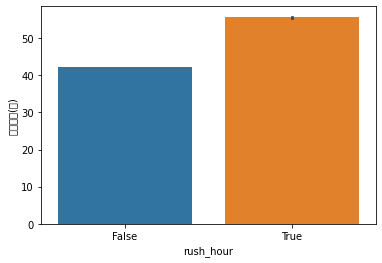

In [25]:
sns.barplot('rush_hour', '이동인구(합)', data=seoul_moving)
plt.show()

In [27]:
rush_t = seoul_moving.loc[seoul_moving['rush_hour'] == True, '이동인구(합)']
not_rush_t = seoul_moving.loc[seoul_moving['rush_hour'] == False, '이동인구(합)']

spst.ttest_ind(rush_t, not_rush_t)

Ttest_indResult(statistic=130.5787528066596, pvalue=0.0)